In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)


In [7]:
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nInfo:\n")
df.info()
print("\nDescribe:\n", df.describe(include='all'))

Shape of dataset: (57394, 49)

Data Types:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million           

In [8]:
print("\nUnique Locations:", df['location'].nunique())
print("\nContinent Frequency:\n", df['continent'].value_counts())
print("\nMax Total Cases:", df['total_cases'].max())
print("Mean Total Cases:", df['total_cases'].mean())
print("\nQuartiles for Total Deaths:\n", df['total_deaths'].quantile([0.25, 0.5, 0.75]))
print("\nContinent with Max HDI:\n", df.loc[df['human_development_index'].idxmax(), 'continent'])
print("\nContinent with Min GDP per Capita:\n", df.loc[df['gdp_per_capita'].idxmin(), 'continent'])



Unique Locations: 216

Continent Frequency:
 continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64

Max Total Cases: 55154651.0
Mean Total Cases: 167797.3688753302

Quartiles for Total Deaths:
 0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

Continent with Max HDI:
 Europe

Continent with Min GDP per Capita:
 Africa


In [9]:
df = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]

In [10]:
df = df.drop_duplicates()
print("\nMissing values before cleaning:\n", df.isnull().sum())
df = df.dropna(subset=['continent'])  # Remove rows with missing continent
df = df.fillna(0)  # Fill all other missing values with 0


Missing values before cleaning:
 continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [11]:
df['date'] = pd.to_datetime(df['date'])  # Convert date to datetime
df['month'] = df['date'].dt.month       # Extract month

C:\Users\Vibhav\AppData\Local\Temp\ipykernel_13368\259144600.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])  # Convert date to datetime


In [12]:
df_groupby = df.groupby('continent').max().reset_index()

In [13]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

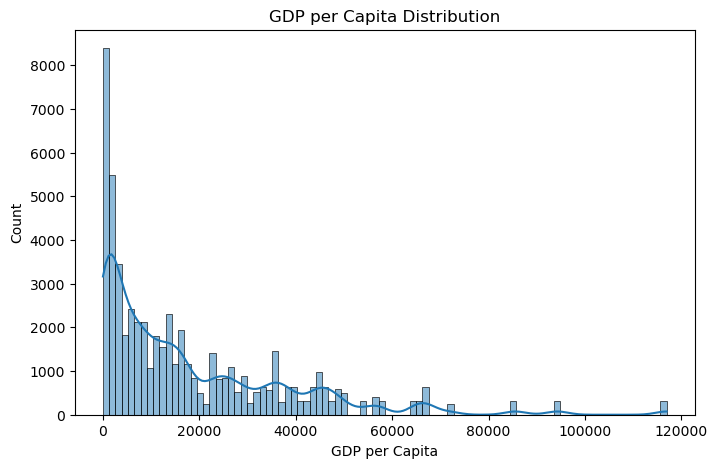

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['gdp_per_capita'], kde=True)
plt.title('GDP per Capita Distribution')
plt.xlabel('GDP per Capita')
plt.show()


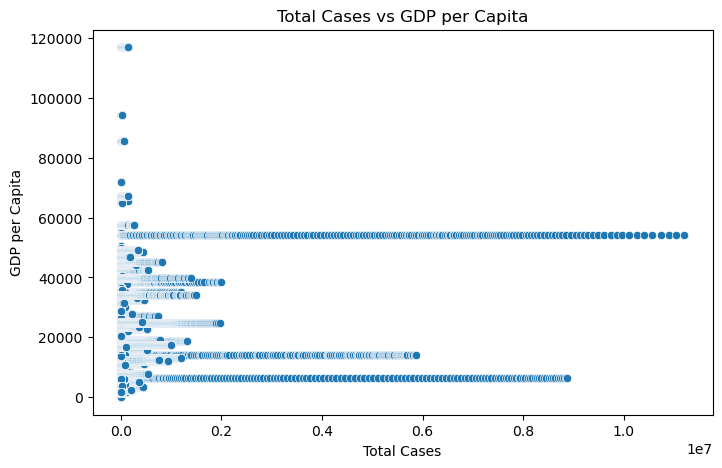

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='total_cases', y='gdp_per_capita')
plt.title('Total Cases vs GDP per Capita')
plt.xlabel('Total Cases')
plt.ylabel('GDP per Capita')
plt.show()

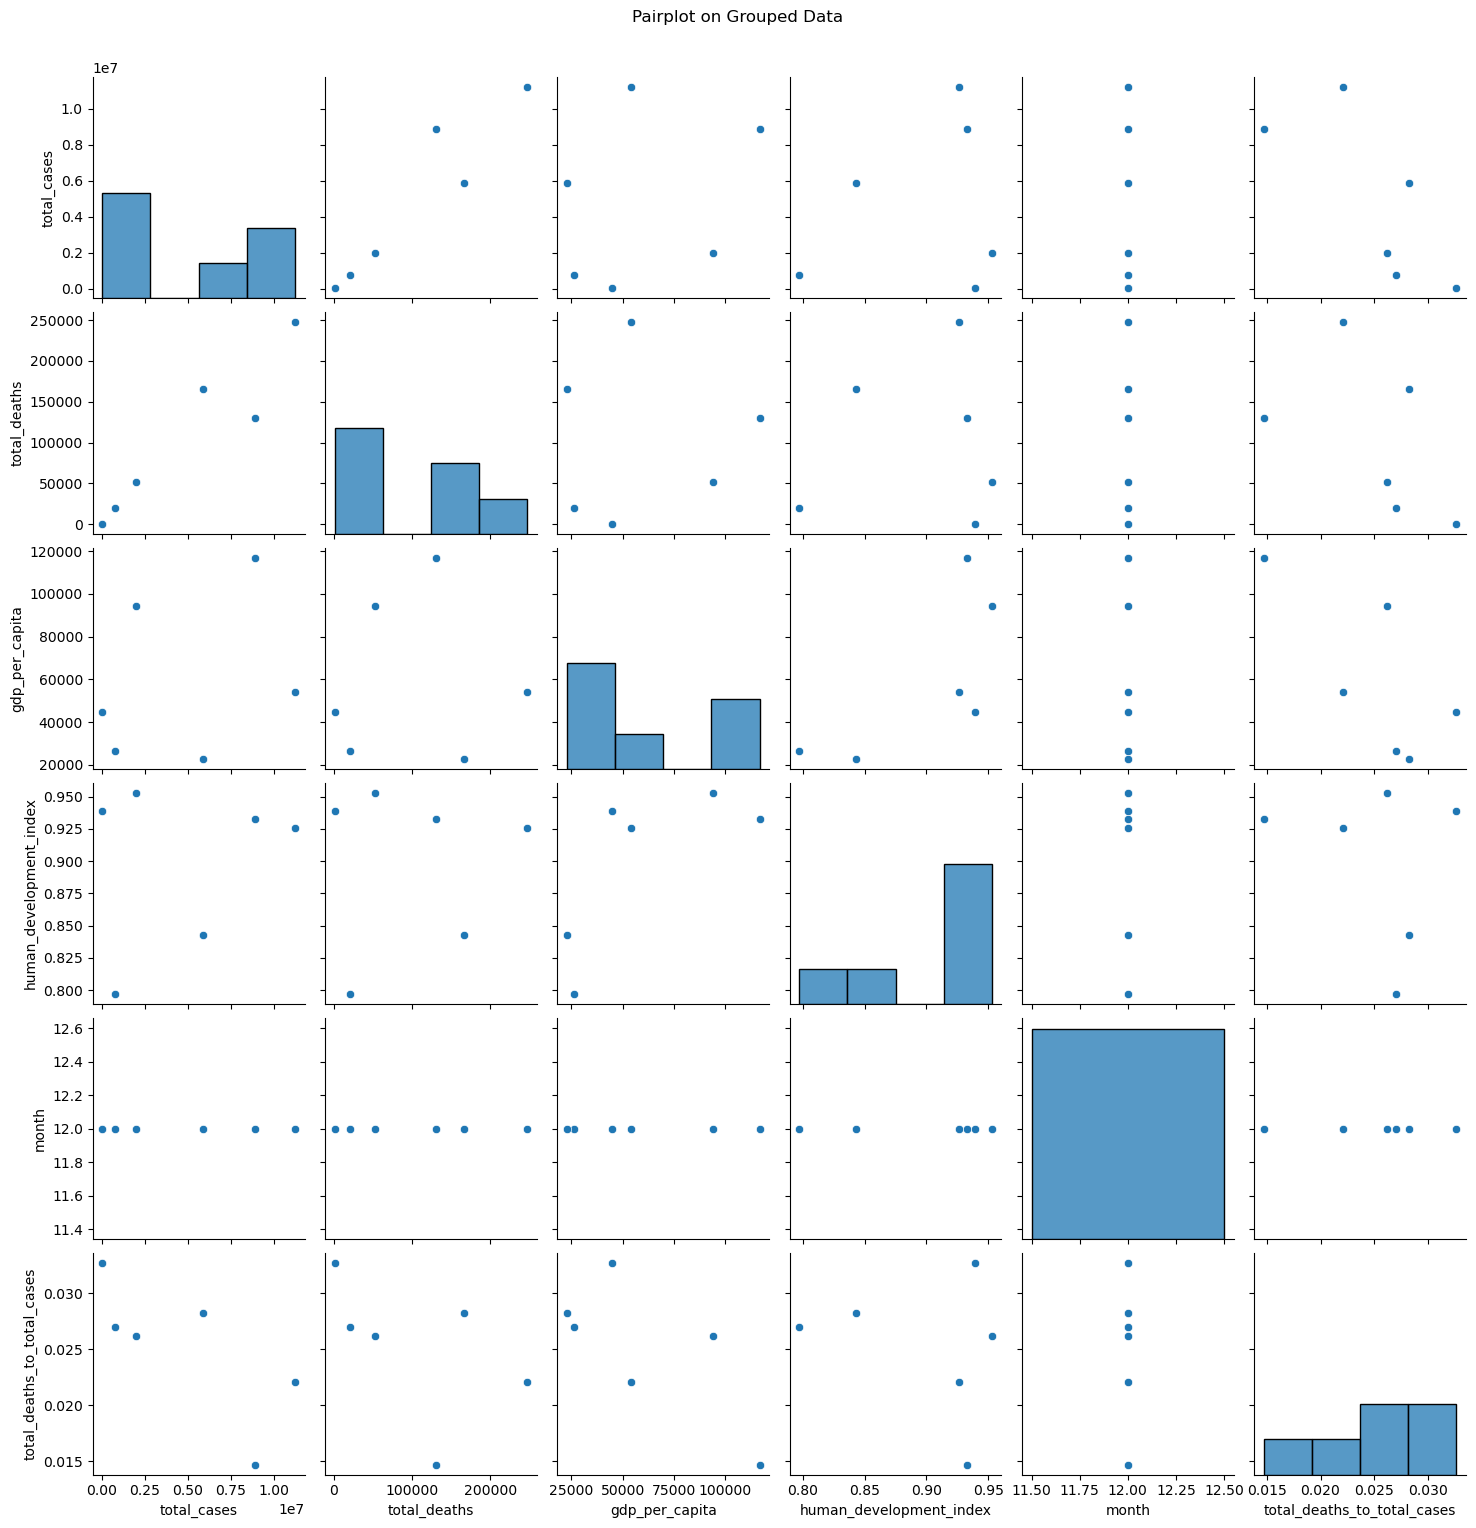

In [16]:
# c. Pairplot on Grouped Data
sns.pairplot(df_groupby)
plt.suptitle("Pairplot on Grouped Data", y=1.02)
plt.show()

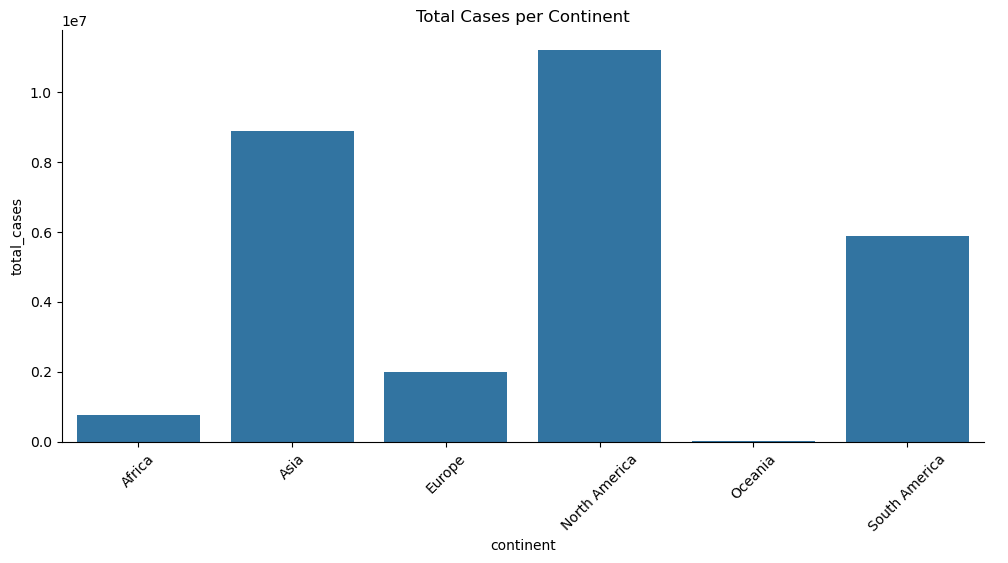

In [17]:
sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar', height=5, aspect=2)
plt.title("Total Cases per Continent")
plt.xticks(rotation=45)
plt.show()

In [18]:
df_groupby.to_csv("covid_grouped_data.csv", index=False)
print("Grouped data saved to 'covid_grouped_data.csv'")

Grouped data saved to 'covid_grouped_data.csv'
